In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

pd. set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data= pd.read_excel('/content/Data_CN7050.xlsx')

data.head()

,Site number,Patient number,Patient id in former eCRF,Date of consent,Inclusion criteria,First name,Last name,Gender,Birth date,Patient code in the center,Date of referral in the center,Height,Weight,Date of creation of patient,Did the patient have pre-colectomy therapy (radiotherapy excluded),Specify,Did the patient have pre-colectomy radiotherapy,Laparoscopic resection,Date of first colectomy,Tumor,Node,Metastasis,Number of resected lymph nodes,Number of resected lymph nodes.1,Number of metastatic lymph nodes,Number of metastatic lymph nodes.1,Tumor margin (rectal tumor only),EGFR amplification,Other mutation,Which,Microsatellite,Diagnosis date,Synchronicity of colorectal cancer,Number of hepatic metastases,Number of hepatic metastases.1,Hepatic metastases maximum size (mm),Hepatic metastases maximum size,Localization,Side,KRAS mutation,Which.1,Microsatellite.1,CT scan abdominal,CT scan chest,MRI,Pet CT,Scintigraphy,Initial resectability,Specify.1,Main reason,ECOG PS at Metastatic diagnosis,Leucocytes,Lower normal range,Higher normal range,Hemoglobin,Lower normal range.1,Higher normal range,Platelets,Lower normal range.2,Higher normal range.1,CEA,Lower normal range.3,Higher normal range.2,Alkaline phosphatases,Lower normal range.4,Higher normal range.3,LDH,Lower normal range.5,Higher normal range.4,Albumin,Lower normal range.6,Higher normal range.5,CA19.9,Lower normal range.7,Higher normal range.6,Does the patient have concomitant extra-hepatic metastases,Diagnosis date.1,CEA (car-old),PATIENT_STATUS
0,95,176,176.0,NaT,Yes,XXX,XXX,Male,NaT,176,2008-07-04,NaN,NaN,2018-06-15,No,NaN,No,No,NaT,T3,N0,M0,ND,ND,0,0,NaN,NaN,NaN,NaN,NaN,2008-06-13,No,1,1,56,56,Unilateral,NaN,NaN,NaN,NaN,Yes,Yes,No,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,87.9,Deceased
1,95,331,331.0,NaT,Yes,XXX,XXX,Female,NaT,331,2010-02-26,NaN,NaN,2018-06-15,No,NaN,No,No,NaT,T3,N1,M1,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaT,Yes,1,1,30,30,Unilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,ND,Deceased
2,95,800,800.0,NaT,Yes,XXX,XXX,Male,NaT,800,2012-01-27,NaN,NaN,2018-06-15,Yes,NaN,No,ND,NaT,ND,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,2011-08-23,Yes,ND,ND,ND,ND,Bilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,No,NaN,Number of metastasis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,ND,Alive
3,95,347,347.0,NaT,Yes,XXX,XXX,Male,NaT,347,2010-02-19,NaN,NaN,2018-06-15,Yes,NaN,Yes,ND,NaT,ND,ND,ND,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,NaT,Yes,3,3,ND,ND,Bilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,79.3,Deceased
4,95,744,744.0,NaT,Yes,XXX,XXX,Male,NaT,744,2013-02-22,NaN,NaN,2018-06-15,No,NaN,No,Yes,2012-08-14,T4,N2,M0,ND,ND,ND,ND,NaN,NaN,NaN,NaN,NaN,2012-07-18,Yes,6,6,6,6,Unilateral,NaN,NaN,NaN,NaN,Yes,Yes,Yes,No,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaT,1,Alive


In [ ]:
data.shape

(4437, 79)

In [ ]:
duplicate = data[data.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Site number,Patient number,Patient id in former eCRF,Date of consent,Inclusion criteria,First name,Last name,Gender,Birth date,Patient code in the center,Date of referral in the center,Height,Weight,Date of creation of patient,Did the patient have pre-colectomy therapy (radiotherapy excluded),Specify,Did the patient have pre-colectomy radiotherapy,Laparoscopic resection,Date of first colectomy,Tumor,Node,Metastasis,Number of resected lymph nodes,Number of resected lymph nodes.1,Number of metastatic lymph nodes,Number of metastatic lymph nodes.1,Tumor margin (rectal tumor only),EGFR amplification,Other mutation,Which,Microsatellite,Diagnosis date,Synchronicity of colorectal cancer,Number of hepatic metastases,Number of hepatic metastases.1,Hepatic metastases maximum size (mm),Hepatic metastases maximum size,Localization,Side,KRAS mutation,Which.1,Microsatellite.1,CT scan abdominal,CT scan chest,MRI,Pet CT,Scintigraphy,Initial resectability,Specify.1,Main reason,ECOG PS at Metastatic diagnosis,Leucocytes,Lower normal range,Higher normal range,Hemoglobin,Lower normal range.1,Higher normal range,Platelets,Lower normal range.2,Higher normal range.1,CEA,Lower normal range.3,Higher normal range.2,Alkaline phosphatases,Lower normal range.4,Higher normal range.3,LDH,Lower normal range.5,Higher normal range.4,Albumin,Lower normal range.6,Higher normal range.5,CA19.9,Lower normal range.7,Higher normal range.6,Does the patient have concomitant extra-hepatic metastases,Diagnosis date.1,CEA (car-old),PATIENT_STATUS


In [ ]:
data.isnull().sum()

Site number                                                              0
Patient number                                                           0
Patient id in former eCRF                                               43
Date of consent                                                       4389
Inclusion criteria                                                       1
First name                                                               0
Last name                                                                0
Gender                                                                   3
Birth date                                                             786
Patient code in the center                                             291
Date of referral in the center                                         852
Height                                                                4376
Weight                                                                4376
Date of creation of patie

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 79 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Site number                                                         4437 non-null   int64         
 1   Patient number                                                      4437 non-null   int64         
 2   Patient id in former eCRF                                           4394 non-null   float64       
 3   Date of consent                                                     48 non-null     datetime64[ns]
 4   Inclusion criteria                                                  4436 non-null   object        
 5   First name                                                          4437 non-null   object        
 6   Last name                                               

In [ ]:
data.isna().sum().sum()

194239

In [ ]:
data.isnull().sum().sum()

194239

In [ ]:

## [Missing Values] ##

# we use the below function to find more information about the #missing values
def info_missing_table(data):
    """Input pandas dataframe and Return columns with missing value and percentage"""
    mis_val = data.isnull().sum() #count total of null in each columns in dataframe
#count percentage of null in each columns
    mis_val_percent = 100 * data.isnull().sum() / len(data) 
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
 #join to left (as column) between mis_val and mis_val_percent
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : 'percentile_missed'}) 
#rename columns in table
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('percentile_missed', ascending=False).round(1) 
        
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"    #.shape[1] : just view total columns in dataframe  
    "There are " + str(mis_val_table_ren_columns.shape[0]) +              
    " columns that have missing values.") #.shape[0] : just view total rows in dataframe
    return mis_val_table_ren_columns
missings = info_missing_table(data)
missings

Your selected dataframe has 79 columns.
There are 74 columns that have missing values.


,Missing Values,percentile_missed
Which.1,4437,100.0
Which,4437,100.0
Lower normal range.7,4431,99.9
CA19.9,4431,99.9
Higher normal range.6,4431,99.9
Specify,4428,99.8
Higher normal range.4,4427,99.8
Lower normal range.5,4427,99.8
Tumor margin (rectal tumor only),4427,99.8
Lower normal range.6,4420,99.6


In [ ]:
def rmissingvaluecol(dff,threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(dff.shape[1] - len(l)))
    print("Columns:\n",list(set(list((dff.columns.values))) - set(l)))
    return l

In [ ]:
 #Here threshold is 95% which means we are going to drop columns having more than 95% of missing values

rmissingvaluecol(data,95)

# Columns having more than 95 percent missing values: 40
Columns:
 ['Lower normal range', 'EGFR amplification', 'Higher normal range.1', 'Specify.1', 'Lower normal range.1', 'CA19.9', 'Specify', 'Lower normal range.6', 'Lower normal range.7', 'Leucocytes', 'Microsatellite.1', 'Higher normal range.6', 'Higher normal range.5', 'Higher normal range.2', 'Which.1', 'Diagnosis date.1', 'Hemoglobin', 'Higher normal range', 'Which', 'Date of consent', 'Other mutation', 'Weight', 'Side', 'Height', 'Scintigraphy', 'ECOG PS at Metastatic diagnosis', 'Platelets', 'Lower normal range.3', 'KRAS mutation', 'LDH', 'Higher normal range.4', 'Lower normal range.2', 'Tumor margin (rectal tumor only)', 'Alkaline phosphatases', 'Lower normal range.5', 'Higher normal range.3', 'Higher  normal range', 'Lower normal range.4', 'Microsatellite', 'Albumin']


['Site number',
 'Patient number',
 'Patient id in former eCRF',
 'Inclusion criteria',
 'First name',
 'Last name',
 'Gender',
 'Birth date',
 'Patient code in the center',
 'Date of referral in the center',
 'Date of creation of patient',
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)',
 'Did the patient have pre-colectomy radiotherapy',
 'Laparoscopic resection',
 'Date of first colectomy',
 'Tumor',
 'Node',
 'Metastasis',
 'Number of resected lymph nodes',
 'Number of resected lymph nodes.1',
 'Number of metastatic lymph nodes',
 'Number of metastatic lymph nodes.1',
 'Diagnosis date',
 'Synchronicity of colorectal cancer',
 'Number of hepatic metastases',
 'Number of hepatic metastases.1',
 'Hepatic metastases maximum size (mm)',
 'Hepatic metastases maximum size',
 'Localization',
 'CT scan abdominal',
 'CT scan chest',
 'MRI',
 'Pet CT',
 'Initial resectability',
 'Main reason',
 'CEA',
 'Does the patient have concomitant extra-hepatic metastases',
 'CEA (

In [ ]:
## [Categorical and Numerical column] ##

# See how many categorical + numerical features:
cat_cols = [features for features in data.columns if data[features].dtype!='int64' and data[features].dtype!='float' and data[features].dtype!='datetime64[ns]']
 
#num_cols = [item[0] for item in data.dtypes if item[1].startswith('int') | item[1].startswith('double')][1:]

print(str(len(cat_cols)) + '  intially categorical features')

50  intially categorical features


In [ ]:
numafea=[fe for fe in data.columns if data[fe].dtype!='O' and data[fe].dtype!='datetime64[ns]']
print(str(len(numafea)) + '  Initially Numarical features')

22  Initially Numarical features


In [ ]:
datafea=[fe for fe in data.columns if data[fe].dtype!='O' and data[fe].dtype!='int64' and data[fe].dtype!='float']
print(str(len(datafea)) + '  Data features')

7  Data features


In [ ]:
datafea

['Date of consent',
 'Birth date',
 'Date of referral in the center',
 'Date of creation of patient',
 'Date of first colectomy',
 'Diagnosis date',
 'Diagnosis date.1']

In [ ]:
remmv = rmissingvaluecol(data,99)
df1 = data[remmv]

# Columns having more than 99 percent missing values: 29
Columns:
 ['Lower normal range', 'Higher normal range.1', 'Lower normal range.1', 'CA19.9', 'Specify', 'Lower normal range.6', 'Lower normal range.7', 'Leucocytes', 'Higher normal range.6', 'Higher normal range.5', 'Higher normal range.2', 'Which.1', 'Hemoglobin', 'Higher normal range', 'Which', 'Side', 'Scintigraphy', 'Lower normal range.3', 'Platelets', 'LDH', 'Higher normal range.4', 'Lower normal range.2', 'Tumor margin (rectal tumor only)', 'Alkaline phosphatases', 'Lower normal range.5', 'Higher normal range.3', 'Higher  normal range', 'Lower normal range.4', 'Albumin']


In [ ]:
df1.shape

(4437, 50)

In [ ]:
## [Categorical and Numerical column] ##

# See how many categorical + numerical features:

numafea=[fe for fe in df1.columns if df1[fe].dtype!='O' and df1[fe].dtype!='datetime64[ns]']
print('after removing the threshold of missing values there are',str(len(numafea)) + '  Numarical features')


cat_cols = [features for features in df1.columns if df1[features].dtype=='O']
 
#num_cols = [item[0] for item in data.dtypes if item[1].startswith('int') | item[1].startswith('double')][1:]

print('after removing the threshold missing values there are',str(len(cat_cols)) + '  categorical features')

datafea=[fe for fe in df1.columns if df1[fe].dtype!='O' and df1[fe].dtype!='int64' and df1[fe].dtype!='float']
print('after removing the threshold missing values there are',str(len(datafea)) + '  Date&Time features')

after removing the threshold of missing values there are 3  Numarical features
after removing the threshold missing values there are 40  categorical features
after removing the threshold missing values there are 7  Date&Time features


In [ ]:
df1.isnull().sum().sum()

66151

In [ ]:
# finding and replacing Missing value in Numeric features

df1[numafea].isnull().sum()

Site number                   0
Patient number                0
Patient id in former eCRF    43
dtype: int64

In [ ]:
len(df1['Patient id in former eCRF'].unique())

1738

In [ ]:
# replacing the null values with there mean value respectively

for features in numafea:
    meanValue = df1[features].mean()
    df1[features].fillna(meanValue, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df1[numafea].isnull().sum()

Site number                  0
Patient number               0
Patient id in former eCRF    0
dtype: int64

In [ ]:
cate_fea= [features for features in df1.columns if df1[features].isnull().sum() >=1 and df1[features].dtype =='O' ]

for features in cate_fea:
    print("{} : {}  values missed and this many {} unique values in this field".format(features, df1[features].isnull().sum(),len(df1[features].unique())))

Inclusion criteria : 1  values missed and this many 3 unique values in this field
Gender : 3  values missed and this many 3 unique values in this field
Patient code in the center : 291  values missed and this many 4117 unique values in this field
Height : 4376  values missed and this many 33 unique values in this field
Weight : 4376  values missed and this many 43 unique values in this field
Did the patient have pre-colectomy therapy (radiotherapy excluded) : 300  values missed and this many 4 unique values in this field
Did the patient have pre-colectomy radiotherapy : 1018  values missed and this many 4 unique values in this field
Laparoscopic resection : 378  values missed and this many 4 unique values in this field
Tumor : 646  values missed and this many 9 unique values in this field
Node : 297  values missed and this many 9 unique values in this field
Metastasis : 373  values missed and this many 6 unique values in this field
Number of resected lymph nodes : 395  values missed an

In [ ]:
df1['PATIENT_STATUS'].unique()

array(['Deceased', 'Alive', nan, 'Lost to follow-up'], dtype=object)

In [ ]:
#PATIENT_STATUS (our tarhet feature) has 44  values missed  so for that iam replacing those values into missing term


df1['PATIENT_STATUS']=df1['PATIENT_STATUS'].fillna('Missing')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df1['PATIENT_STATUS'].unique()

array(['Deceased', 'Alive', 'Missing', 'Lost to follow-up'], dtype=object)

In [ ]:
temp=df1.groupby('PATIENT_STATUS').count()

temp

,Site number,Patient number,Patient id in former eCRF,Date of consent,Inclusion criteria,First name,Last name,Gender,Birth date,Patient code in the center,Date of referral in the center,Height,Weight,Date of creation of patient,Did the patient have pre-colectomy therapy (radiotherapy excluded),Did the patient have pre-colectomy radiotherapy,Laparoscopic resection,Date of first colectomy,Tumor,Node,Metastasis,Number of resected lymph nodes,Number of resected lymph nodes.1,Number of metastatic lymph nodes,Number of metastatic lymph nodes.1,EGFR amplification,Other mutation,Microsatellite,Diagnosis date,Synchronicity of colorectal cancer,Number of hepatic metastases,Number of hepatic metastases.1,Hepatic metastases maximum size (mm),Hepatic metastases maximum size,Localization,KRAS mutation,Microsatellite.1,CT scan abdominal,CT scan chest,MRI,Pet CT,Initial resectability,Specify.1,Main reason,ECOG PS at Metastatic diagnosis,CEA,Does the patient have concomitant extra-hepatic metastases,Diagnosis date.1,CEA (car-old)
PATIENT_STATUS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alive,2344,2344,2344,32,2344,2344,2344,2343,1946,2232,2072,43,43,2344,2229,2048,2199,1747,2044,2247,2194,2185,2183,2184,2183,36,36,39,1772,2224,2226,2204,2219,2166,2226,37,36,2194,2189,2178,2173,2223,15,314,31,2185,2062,82,2158
Deceased,2016,2016,2016,4,2015,2016,2016,2014,1629,1838,1439,5,5,2016,1836,1303,1788,1720,1680,1824,1800,1789,1788,1790,1789,5,5,6,1455,1834,1837,1772,1831,1784,1834,5,6,1791,1789,1783,1781,1833,42,320,6,1791,1654,59,1791
Lost to follow-up,33,33,33,1,33,33,33,33,33,33,33,2,2,33,33,31,33,28,31,32,33,31,31,31,31,2,2,2,18,33,33,32,33,32,32,3,2,33,33,33,33,32,1,14,1,28,31,1,27
Missing,44,44,44,11,44,44,44,44,43,43,41,11,11,44,39,37,39,27,36,37,37,37,36,37,37,5,5,5,24,32,32,31,32,23,32,6,5,32,31,31,31,31,0,6,7,28,28,1,23


In [ ]:
df1= df1[(df1.PATIENT_STATUS != 'Missing') & (df1.PATIENT_STATUS != 'Lost to follow-up')]

In [ ]:
temp1=df1.groupby('PATIENT_STATUS').count()

temp1

,Site number,Patient number,Patient id in former eCRF,Date of consent,Inclusion criteria,First name,Last name,Gender,Birth date,Patient code in the center,Date of referral in the center,Height,Weight,Date of creation of patient,Did the patient have pre-colectomy therapy (radiotherapy excluded),Did the patient have pre-colectomy radiotherapy,Laparoscopic resection,Date of first colectomy,Tumor,Node,Metastasis,Number of resected lymph nodes,Number of resected lymph nodes.1,Number of metastatic lymph nodes,Number of metastatic lymph nodes.1,EGFR amplification,Other mutation,Microsatellite,Diagnosis date,Synchronicity of colorectal cancer,Number of hepatic metastases,Number of hepatic metastases.1,Hepatic metastases maximum size (mm),Hepatic metastases maximum size,Localization,KRAS mutation,Microsatellite.1,CT scan abdominal,CT scan chest,MRI,Pet CT,Initial resectability,Specify.1,Main reason,ECOG PS at Metastatic diagnosis,CEA,Does the patient have concomitant extra-hepatic metastases,Diagnosis date.1,CEA (car-old)
PATIENT_STATUS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alive,2344,2344,2344,32,2344,2344,2344,2343,1946,2232,2072,43,43,2344,2229,2048,2199,1747,2044,2247,2194,2185,2183,2184,2183,36,36,39,1772,2224,2226,2204,2219,2166,2226,37,36,2194,2189,2178,2173,2223,15,314,31,2185,2062,82,2158
Deceased,2016,2016,2016,4,2015,2016,2016,2014,1629,1838,1439,5,5,2016,1836,1303,1788,1720,1680,1824,1800,1789,1788,1790,1789,5,5,6,1455,1834,1837,1772,1831,1784,1834,5,6,1791,1789,1783,1781,1833,42,320,6,1791,1654,59,1791


In [ ]:
df1[cat_cols].isnull().sum().sum()


52684

In [ ]:
# finding and replacing Missing value with there Mode value in Categorical features columns


cols = df1[cat_cols].columns

df1[cols]=df1[cols].fillna(df1.mode().iloc[0])

In [ ]:

df1[cat_cols].isnull().sum().sum()

0

In [ ]:
df1= df1.drop(['Date of consent','Patient number','Patient id in former eCRF','First name', 'Last name','Patient code in the center',
 'Birth date',
 'Date of referral in the center',
 'Date of creation of patient',
 'Date of first colectomy',
 'Diagnosis date',
 'Diagnosis date.1'],axis=1)

df1.head(2)

,Site number,Inclusion criteria,Gender,Height,Weight,Did the patient have pre-colectomy therapy (radiotherapy excluded),Did the patient have pre-colectomy radiotherapy,Laparoscopic resection,Tumor,Node,Metastasis,Number of resected lymph nodes,Number of resected lymph nodes.1,Number of metastatic lymph nodes,Number of metastatic lymph nodes.1,EGFR amplification,Other mutation,Microsatellite,Synchronicity of colorectal cancer,Number of hepatic metastases,Number of hepatic metastases.1,Hepatic metastases maximum size (mm),Hepatic metastases maximum size,Localization,KRAS mutation,Microsatellite.1,CT scan abdominal,CT scan chest,MRI,Pet CT,Initial resectability,Specify.1,Main reason,ECOG PS at Metastatic diagnosis,CEA,Does the patient have concomitant extra-hepatic metastases,CEA (car-old),PATIENT_STATUS
0,95,Yes,Male,1.7,70.0,No,No,No,T3,N0,M0,ND,ND,0,0,Unknown,Unknown,Unknown,No,1,1,56,56,Unilateral,Unknown,Unknown,Yes,Yes,No,No,Yes,HIGH CEA,Number of metastasis,0,87.9,No,87.9,Deceased
1,95,Yes,Female,1.7,70.0,No,No,No,T3,N1,M1,ND,ND,ND,ND,Unknown,Unknown,Unknown,Yes,1,1,30,30,Unilateral,Unknown,Unknown,Yes,Yes,Yes,No,Yes,HIGH CEA,Number of metastasis,0,ND,No,ND,Deceased


In [ ]:
X= df1.drop('PATIENT_STATUS', axis=1).astype(str)

X.sample(2)

y= df1['PATIENT_STATUS'].astype(str)

y.sample(2)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)
# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown = 'ignore')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))


print("Confusion Matrix")
print(confusion_matrix(y_test, yhat))

# View the classification report for test data and predictions
print("Classification Report")
print(classification_report(y_test, yhat))


Accuracy: 69.45
Confusion Matrix
[[435 126]
 [207 322]]
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.78      0.72       561
           1       0.72      0.61      0.66       529

    accuracy                           0.69      1090
   macro avg       0.70      0.69      0.69      1090
weighted avg       0.70      0.69      0.69      1090



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion Matrix
[[435 126]
 [207 322]]


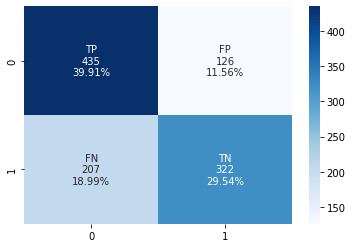

In [ ]:
# View confusion matrix for test data and predictions
print("Confusion Matrix")
print(confusion_matrix(y_test, yhat))

cf_matrix=confusion_matrix(y_test, yhat)
group_names = ['TP','FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


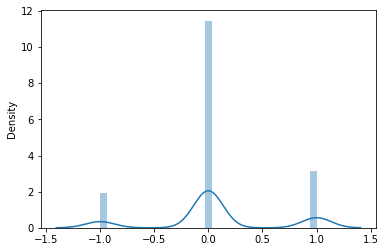

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(y_test-yhat)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Decision Tree Classifier Model Accuracy: %.2f' % (accuracy*100))



Decision Tree Classifier Model Accuracy: 64.59


Confusion Matrix
[[384 177]
 [209 320]]


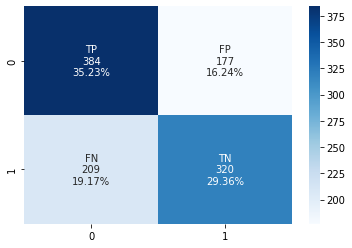

In [ ]:
# View confusion matrix for test data and predictions
print("Confusion Matrix")
print(confusion_matrix(y_test, yhat))

cf_matrix=confusion_matrix(y_test, yhat)
group_names = ['TP','FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [ ]:

# View the classification report for test data and predictions
print("Classification Report")
print(classification_report(y_test, yhat))

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       561
           1       0.64      0.60      0.62       529

    accuracy                           0.65      1090
   macro avg       0.65      0.64      0.64      1090
weighted avg       0.65      0.65      0.65      1090



>1, train: 0.631, test: 0.596
>2, train: 0.651, test: 0.615
>3, train: 0.659, test: 0.617
>4, train: 0.663, test: 0.653
>5, train: 0.695, test: 0.681
>6, train: 0.717, test: 0.674
>7, train: 0.732, test: 0.677
>8, train: 0.757, test: 0.683
>9, train: 0.772, test: 0.693
>10, train: 0.785, test: 0.694
>11, train: 0.799, test: 0.694
>12, train: 0.809, test: 0.688
>13, train: 0.821, test: 0.683
>14, train: 0.832, test: 0.683
>15, train: 0.850, test: 0.684
>16, train: 0.857, test: 0.668
>17, train: 0.877, test: 0.661
>18, train: 0.893, test: 0.663
>19, train: 0.902, test: 0.658
>20, train: 0.911, test: 0.654


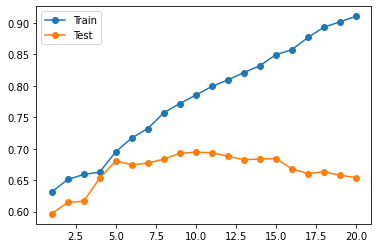

In [ ]:
from matplotlib import pyplot
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('RandomForest Classifier Model Accuracy: %.2f' % (accuracy*100))




RandomForest Classifier Model Accuracy: 70.46


Confusion Matrix


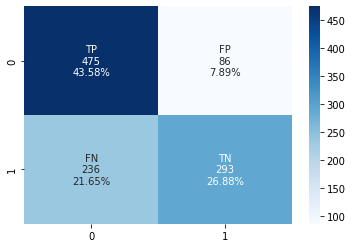

In [ ]:
# View confusion matrix for test data and predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#print(confusion_matrix(y_test, yhat))
cf_matrix=confusion_matrix(y_test, yhat)
group_names = ['TP','FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
print("Confusion Matrix")

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [ ]:
# View the classification report for test data and predictions
print("Classification Report")
print(classification_report(y_test, yhat))

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       561
           1       0.77      0.55      0.65       529

    accuracy                           0.70      1090
   macro avg       0.72      0.70      0.70      1090
weighted avg       0.72      0.70      0.70      1090



In [ ]:
model = RandomForestClassifier(bootstrap=True, max_depth=100, min_samples_leaf=3,min_samples_split=10,n_estimators=100)


model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('RandomForest Classifier Model Accuracy: %.2f' % (accuracy*100))



RandomForest Classifier Model Accuracy: 69.72


In [ ]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('KNeighborsClassifier Model Accuracy: %.2f' % (accuracy*100))

# View confusion matrix for test data and predictions
print("Confusion Matrix")
print(confusion_matrix(y_test, yhat))

# View the classification report for test data and predictions
print("Classification Report")
print(classification_report(y_test, yhat))

KNeighborsClassifier Model Accuracy: 66.15
Confusion Matrix
[[404 157]
 [212 317]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       561
           1       0.67      0.60      0.63       529

    accuracy                           0.66      1090
   macro avg       0.66      0.66      0.66      1090
weighted avg       0.66      0.66      0.66      1090



AdaBoost Classifier Model Accuracy: 68.17
Confusion Matrix
[[449 112]
 [235 294]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       561
           1       0.72      0.56      0.63       529

    accuracy                           0.68      1090
   macro avg       0.69      0.68      0.68      1090
weighted avg       0.69      0.68      0.68      1090



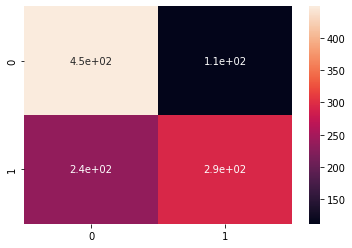

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('AdaBoost Classifier Model Accuracy: %.2f' % (accuracy*100))

print("Confusion Matrix")
print(confusion_matrix(y_test, yhat))
CM=confusion_matrix(y_test, yhat)
import seaborn as sns
sns.heatmap(CM, annot=True)

# View the classification report for test data and predictions
print("Classification Report")
print(classification_report(y_test, yhat))


Gradient Boosting Classifier Model Accuracy: 73.21
Confusion Matrix
[[457 104]
 [188 341]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       561
           1       0.77      0.64      0.70       529

    accuracy                           0.73      1090
   macro avg       0.74      0.73      0.73      1090
weighted avg       0.74      0.73      0.73      1090



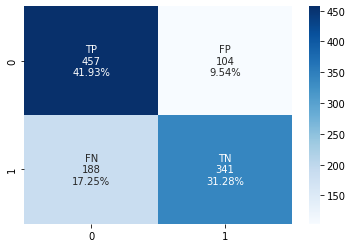

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Gradient Boosting Classifier Model Accuracy: %.2f' % (accuracy*100))


print("Confusion Matrix")
print(confusion_matrix(y_test, yhat))

cf_matrix=confusion_matrix(y_test, yhat)
group_names = ['TP','FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# View the classification report for test data and predictions
print("Classification Report")
print(classification_report(y_test, yhat))


 Support Vector Machine Model Accuracy: 73.21
Confusion Matrix
[[471  90]
 [202 327]]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       561
           1       0.78      0.62      0.69       529

    accuracy                           0.73      1090
   macro avg       0.74      0.73      0.73      1090
weighted avg       0.74      0.73      0.73      1090



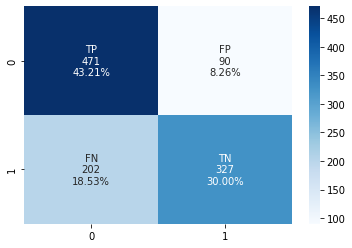

In [ ]:
from sklearn.svm import SVC
model=SVC()

model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(' Support Vector Machine Model Accuracy: %.2f' % (accuracy*100))


print("Confusion Matrix")
CM=confusion_matrix(y_test, yhat)
print(confusion_matrix(y_test, yhat))


cf_matrix=confusion_matrix(y_test, yhat)

group_names = ['TP','FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# View the classification report for test data and predictions
print("Classification Report")
print(classification_report(y_test, yhat))


In [ ]:

from xgboost import XGBClassifier
# fit model no training data
modelxgb = XGBClassifier()
modelxgb.fit(X_train, y_train)
# make predictions for test data
y_pred = modelxgb.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.48%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


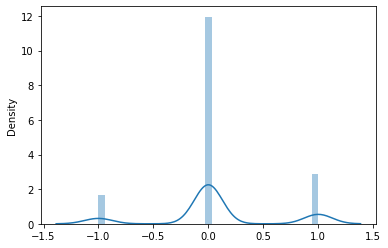

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(y_test-y_pred)

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = 20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               297472    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 462,337
Trainable params: 462,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


327/327 [==============================] - 4s 7ms/step - loss: 0.6331 - accuracy: 0.6514 - val_loss: 0.6044 - val_accuracy: 0.6560
Epoch 2/20
327/327 [==============================] - 2s 6ms/step - loss: 0.5823 - accuracy: 0.7031 - val_loss: 0.5805 - val_accuracy: 0.6963
Epoch 3/20
327/327 [==============================] - 2s 6ms/step - loss: 0.5389 - accuracy: 0.7370 - val_loss: 0.5695 - val_accuracy: 0.7284
Epoch 4/20
327/327 [==============================] - 2s 6ms/step - loss: 0.5011 - accuracy: 0.7651 - val_loss: 0.5986 - val_accuracy: 0.6890
Epoch 5/20
327/327 [==============================] - 2s 6ms/step - loss: 0.4526 - accuracy: 0.7972 - val_loss: 0.6955 - val_accuracy: 0.6716
Epoch 6/20
327/327 [==============================] - 2s 6ms/step - loss: 0.4090 - accuracy: 0.8242 - val_loss: 0.7235 - val_accuracy: 0.6927
Epoch 7/20
327/327 [==============================] - 2s 6ms/step - loss: 0.3719 - accuracy: 0.8398 - val_loss: 0.8291 - val_accuracy: 0.6606
Epoch 8/20
327/32

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


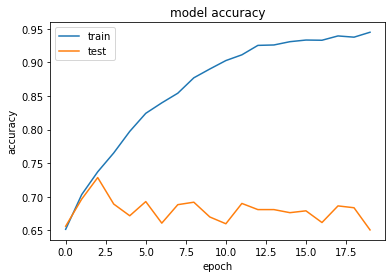

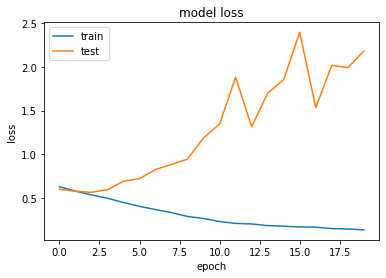

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import missingno as msno

da= pd.read_excel('/content/Data_CN7050.xlsx')

da.head()

In [ ]:
# Checking for missing values.

msno.bar(da)

In [ ]:
df1.head(2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = LabelEncoder()
mappings = []

for i, col in enumerate(df1):
    if df1[col].dtype == 'object':
        df1[col] = label_encoder.fit_transform(np.array(df1[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

df1.head()

In [ ]:
# Split into predictor and response dataframes.

X_df = df1.drop('PATIENT_STATUS', axis=1)
y = df1['PATIENT_STATUS']

X_df.shape,y.shape

In [ ]:
X_df.head(2)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape







In [ ]:
# Create first pipeline for base without reducing features.

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

In [ ]:
best_clf.best_estimator_.get_params()['classifier']

In [ ]:
print('Model accuracy is',best_clf.score(X_test, y_test))

In [ ]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
roc_auc

In [ ]:
"""
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelxgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances
"""

In [ ]:
stoping here

In [ ]:

df1.head(2)

In [ ]:
cate_fea = [feature for feature in df1.columns if df1[feature].dtypes == 'O']

In [ ]:
len(cate_fea)

In [ ]:
df3= df1.drop('PATIENT_STATUS', axis=1)

In [ ]:
cate_fea = [feature for feature in df3.columns if df3[feature].dtypes == 'O']
len(cate_fea)

In [ ]:
df3[cate_fea].dtypes

In [ ]:
df3.isnull().sum().sum()

In [ ]:
df3.isna().sum().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

leaenc = preprocessing.LabelEncoder()

#for ele in cate_fea:
  #X[ele]=leaenc.fit_transform(X[ele])
    

    

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encoder(df3):
    for col in df3.columns:
      if df3.dtypes[col] == "object":
        le = preprocessing.LabelEncoder()
        le.fit(df3[col])
        df3[col] = le.transform(df3[col])
        #return df3

In [ ]:
encoder(df3)

In [ ]:
#Label encoding

In [ ]:
X.columns

In [ ]:
X.dtypes

In [ ]:
X.shape

In [ ]:
y.head(2)

In [ ]:
y.unique()

In [ ]:
y.dtypes

In [ ]:

df1['PATIENT_STATUS']=np.where(df1['PATIENT_STATUS']=="Alive",1,0)

In [ ]:
df1['PATIENT_STATUS'].head()

In [ ]:
y=df1['PATIENT_STATUS']

In [ ]:
y.head()

In [ ]:
X.corr()

In [ ]:
# split the dataset into train and test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=34)

print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)

print(y_te.shape)


In [ ]:
y.head()

# **Feature selection by using Extra tree regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_tr, y_tr)

In [ ]:
print(model.feature_importances_)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
stop here

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_tr, y_tr)

In [ ]:
feature_sel_model.get_support()

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_tr.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_tr.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

In [ ]:

selected_feat

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_tr, y_tr)
X_train_fs = fs.transform(X_tr)
X_test_fs = fs.transform(X_te)

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
Stopping here

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder


In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)


In [ ]:
X_test = onehot_encoder.transform(X_test)


In [ ]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
X_train.shape

In [ ]:
X_train.data

In [ ]:
X.head()

In [ ]:
X.dtypes

In [ ]:
cols= X.columns
cols

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#array = df1.values
#X = array[:,0:36]
#Y = array[:,36]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

In [ ]:
from numpy import cov
# calculate covariance matrix
covariance = cov(X,y)
print(covariance)

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown = 'ignore')
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Decision Tree Classifier Model Accuracy: %.2f' % (accuracy*100))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('RandomForest Classifier Model Accuracy: %.2f' % (accuracy*100))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('AdaBoost Classifier Model Accuracy: %.2f' % (accuracy*100))


Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Gradient Boosting Classifier Model Accuracy: %.2f' % (accuracy*100))

K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('KNeighborsClassifier Model Accuracy: %.2f' % (accuracy*100))

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model=SVC()

model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(' Support Vector Machine Model Accuracy: %.2f' % (accuracy*100))


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [ ]:
# There are 3 different Naive Bayes Classes.
from sklearn.naive_bayes import GaussianNB 
#If the data or column you guess is continuous (real, decimal, etc.)
from sklearn.naive_bayes import BernoulliNB 
#If the data or column you guess is binary.(Yes / No, etc.)
from sklearn.naive_bayes import MultinomialNB 
#If the data or column you guess is nominal (Int numbers)

modelg=GaussianNB()
modelb=BernoulliNB()
#m=MultinomialNB()

modelg.fit(X_train, y_train)
# predict on test set
yhat = modelg.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(' GaussianNB Model Accuracy: %.2f' % (accuracy*100))



In [ ]:
df1.corr()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import time 
from lazypredict.Supervised import LazyClassifier,LazyRegressor

clsmodel=LazyClassifier(verbose=0,predictions=True)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=clsmodel.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

# to check which model did better on the UNSW-NB15 dataset 
models_c

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report


print(accuracy_score(y_test,pred1),precision_score(y_test,pred1),
      recall_score(y_test,pred1),f1_score(y_test,pred1))
print(accuracy_score(y_test,pred2),precision_score(y_test,pred2),
      recall_score(y_test,pred2),f1_score(y_test,pred2))
#print(accuracy_score(y_test,pred3),precision_score(y_test,pred3),
      #recall_score(y_test,pred3),f1_score(y_test,pred3))
print("\n")
# the best estimate will give bernouilli of course.(Attrition->hire or not)
print(confusion_matrix(y_test,pred2))
#true positive 848 and true negative 172
#false positive 59 and false negative 126

print(classification_report(y_test,pred2))


Applying Standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScalar(with_mean=False)
#scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [ ]:
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
y_tr.head()

In [ ]:
df1.head(1)

In [ ]:
y=df1['PATIENT_STATUS']

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=34)

In [ ]:
#Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_tr, y_tr)

In [ ]:
print(model.feature_importances_)

In [ ]:
len(model.feature_importances_)

In [ ]:
X.columns

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X_tr.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
#plot graph of feature importances for better visualization

#finding top 10 important features***********

feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
X_tr.head()

In [ ]:
len(X_tr['First name'].unique())

In [ ]:
len(X_tr['Last name'].unique())

In [ ]:
len(X_tr['Patient code in the center'].unique())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=34)

In [ ]:
X.head(2)

In [ ]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder(handle_unknown = 'ignore')
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder(handle_unknown = 'ignore')
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
# one-hot encode input variables
onehot_encoder = OneHotEncoder(handle_unknown = 'ignore')
onehot_encoder.fit(X_train)
X_train_enc = onehot_encoder.transform(X_train)
X_test_enc = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_enc = label_encoder.transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

In [ ]:
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
#correlation finding

In [ ]:
corr_Survived = pd.DataFrame(crr['TravelInsurance'].drop('TravelInsurance'))
corr_Survived.sort_values(by = 'TravelInsurance', ascending = False)

In [ ]:
!pip install lazypredict -q

In [ ]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_tr,X_te,y_tr,y_te)

print(models)